ThinkDSP
===
by Allen Downey (http://think-dsp.com)

This notebook contains examples and demos for a SciPy 2015 talk.

In [1]:
import os, sys
module_path = os.path.abspath(os.path.join('..')) # append directory one level up to import path
if module_path not in sys.path:  # ... if it hasn't been appended already
    sys.path.append(module_path)

import dsp_fpga_lib as dsp
import thinkdsp
import thinkplot

import numpy

%matplotlib inline

A Signal represents a function that can be evaluated at an point in time.

In [2]:
cos_sig = thinkdsp.CosSignal(freq=440)

A cosine signal at 440 Hz has a period of 2.3 ms.

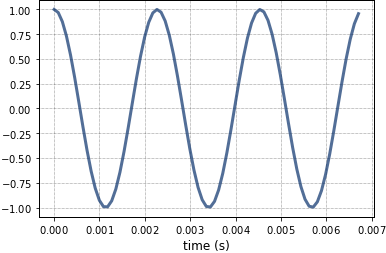

In [3]:
cos_sig.plot()
thinkplot.config(xlabel='time (s)', legend=False)

`make_wave` samples the signal at equally-space time steps.

In [4]:
wave = cos_sig.make_wave(duration=0.5, framerate=11025)

`make_audio` creates a widget that plays the Wave.

In [5]:
wave.apodize()
wave.make_audio()

A SawTooth signal has a more complex harmonic structure.

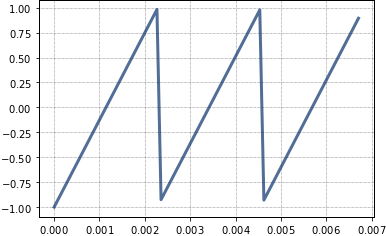

In [6]:
saw_sig = thinkdsp.SawtoothSignal(freq=440)
saw_sig.plot()

Here's what it sounds like:

In [7]:
saw_wave = saw_sig.make_wave(duration=0.5)
saw_wave.make_audio()

Here's a short violin performance from jcveliz on freesound.org:

In [8]:
violin = thinkdsp.read_wave('../medien/92002__jcveliz__violin-origional.wav')
violin.make_audio()

Up next is one of the coolest examples in Think DSP.  It uses LTI system theory to characterize the acoustics of a recording space and simulate the effect this space would have on the sound of a violin performance.

I'll start with a recording of a gunshot:

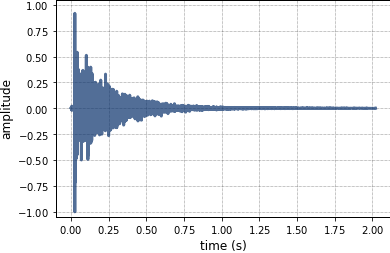

In [9]:
response = thinkdsp.read_wave('../medien/180960__kleeb__gunshot.wav')

start = 0.12
response = response.segment(start=start)
response.shift(-start)

response.normalize()
response.plot()
thinkplot.config(xlabel='time (s)', 
                 ylabel='amplitude', 
                 ylim=[-1.05, 1.05], 
                 legend=False)

If you play this recording, you can hear the initial shot and several seconds of echos.

In [10]:
response.make_audio()

This wave records the "impulse response" of the room where the gun was fired.

Now let's load a recording of a violin performance:

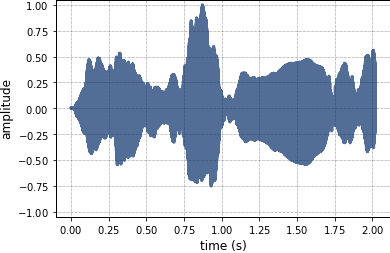

In [11]:
wave = thinkdsp.read_wave('../medien/92002__jcveliz__violin-origional.wav')
start = 0.11
wave = wave.segment(start=start)
wave.shift(-start)

wave.truncate(len(response))
wave.normalize()
wave.plot()
thinkplot.config(xlabel='time (s)', 
                 ylabel='amplitude', 
                 ylim=[-1.05, 1.05],
                 legend=False)

And listen to it:

In [12]:
wave.make_audio()

Now we can figure out what the violin would sound like if it was played in the room where the gun was fired.  All we have to do is convolve the two waves:

In [ ]:
output = wave.convolve(response)
output.normalize()

Here's what it looks like:

In [ ]:
wave.plot(label='original')
output.plot(label='convolved')
thinkplot.config(xlabel='time (s)', ylabel='amplitude', ylim=[-1.05, 1.05])

And here's what it sounds like:

In [ ]:
output.make_audio()

If you think this example is black magic, you are not alone.   But there is a good reason why this works, and I do my best to explain it in Chapter 9.  So stay tuned.

I'd like to thanks jcveliz and kleeb for making these recordings available from freesound.org.